## Student Performance Prediction using Machine Learning
Student success is influenced by academic scores, background factors, and learning support. This project applies machine learning to predict whether a student will pass or fail based on features such as math, reading and writing scores, parental education, lunch type, and test preparation status.

#### Key Highlights:
* Built a classification model to predict student academic outcome
* Performed data preprocessing, encoding, feature alignment and model training
* Conducted exploratory data analysis to understand score distribution and feature impact
* Achieved reliable accuracy and balanced performance metrics
* Focused on interpretability for both technical and non-technical readers

This project demonstrates how data and machine learning can support early academic intervention and help identify students who may need additional support.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'Expanded_data_with_more_features.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## EDA (Exploratory Data Analysis) And Preprocessing

In [4]:
df.shape

(30641, 15)

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Separate numeric and categorical columns

In [8]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [9]:
from sklearn.impute import SimpleImputer

# Fill numeric NaN with mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

### Fill categorical NaN with most frequent value

In [10]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [11]:
df.isna().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [12]:
df = df.drop("Unnamed: 0",axis = 1)

In [13]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45.0,56.0,42.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0


### Change weekly study hours columns

In [14]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("05-Oct","5-10")

In [15]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45.0,56.0,42.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0


In [16]:
df['AverageScore'] = (df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3

df['Result'] = df['AverageScore'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AverageScore,Result
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,72.000000,Pass
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69.0,90.0,88.0,82.333333,Pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,90.333333,Pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45.0,56.0,42.0,47.666667,Fail
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,76.333333,Pass


## Data Visualization

## Gender Distribution

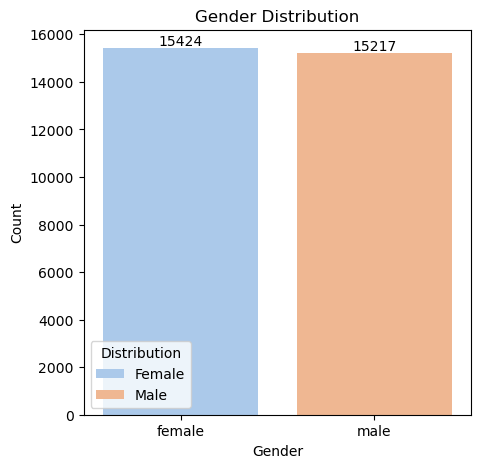

In [17]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x="Gender", palette="pastel")

for container in ax.containers:
    ax.bar_label(container)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Distribution", labels=["Female", "Male"])
plt.show()

In [18]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})

In [19]:
gb.head()

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.445978,69.189667,68.456711


### Heatmap Show Realtion Between Parent's Education and Student's Score

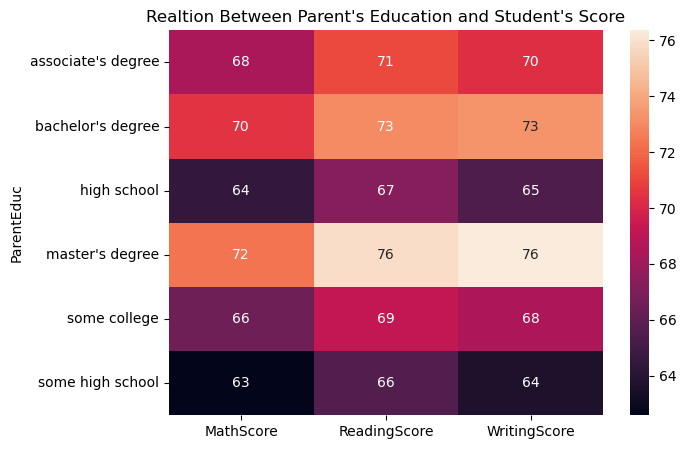

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(gb, annot = True)
plt.title("Realtion Between Parent's Education and Student's Score")
plt.show()

In [21]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})

In [22]:
gb1.head()

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


### Heatmap Realtion Between Parent's Marital Status and Student's Score

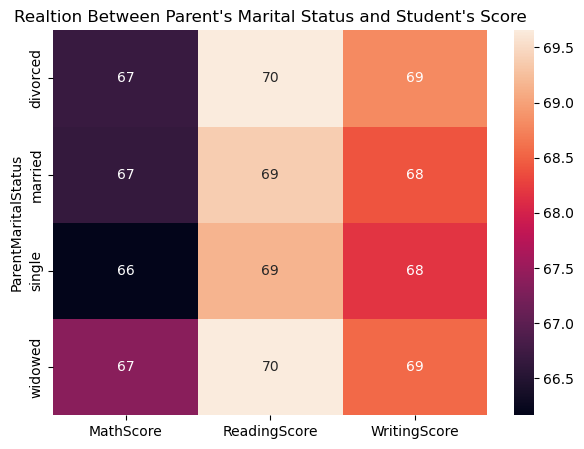

In [23]:
plt.figure(figsize=(7,5))
sns.heatmap(gb1, annot = True)
plt.title("Realtion Between Parent's Marital Status and Student's Score")
plt.show()

## Checking Outlier

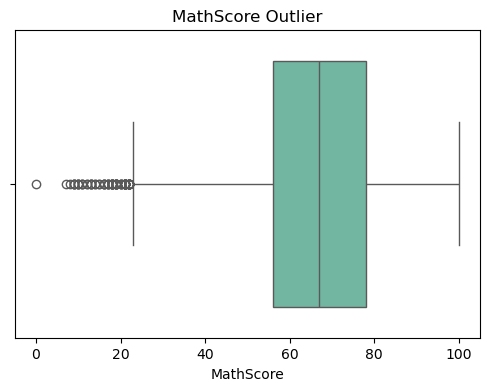

In [24]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=df, x="MathScore" ,palette="Set2")
plt.title("MathScore Outlier")
plt.show()

### ReadingScore Outlier

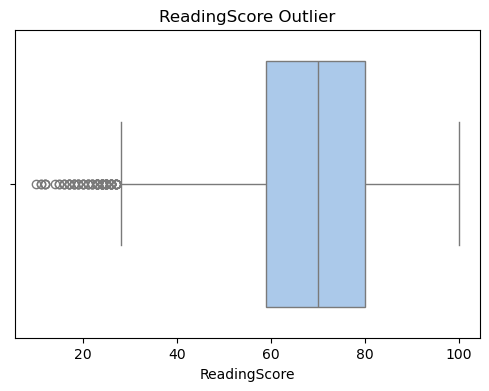

In [25]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=df, x="ReadingScore" ,palette='pastel')
plt.title("ReadingScore Outlier")
plt.show()

### WritingScore Outlier

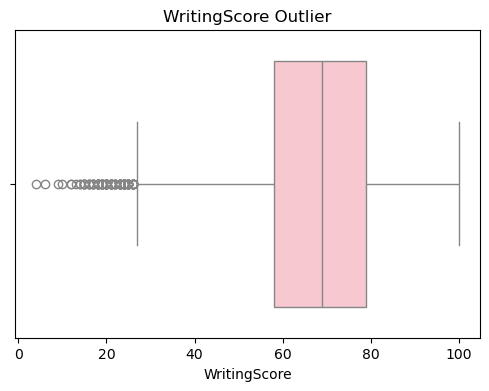

In [26]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=df, x="WritingScore" ,color='pink')
plt.title("WritingScore Outlier")
plt.show()

### Outlier removal using IQR

In [27]:
df_before = df.copy()

# Outlier removal using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

cols = ['MathScore', 'ReadingScore', 'WritingScore']
df_after = remove_outliers_iqr(df, cols)


In [28]:
print("Before removing:", df_before.shape)
print("After removing:", df_after.shape)

Before removing: (30641, 16)
After removing: (30475, 16)


### Checking Outliers is remove or not

In [29]:
def check_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: Remaining outliers = {len(outliers)}")

check_outliers(df_after, cols)

MathScore: Remaining outliers = 0
ReadingScore: Remaining outliers = 22
WritingScore: Remaining outliers = 0


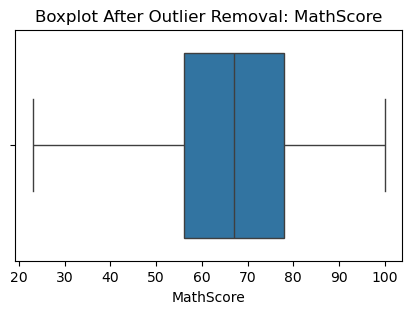

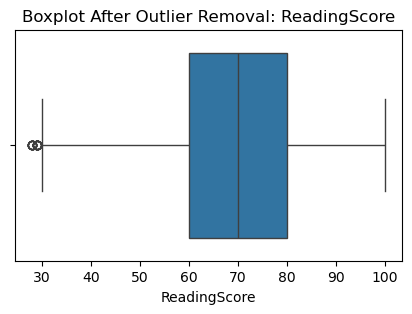

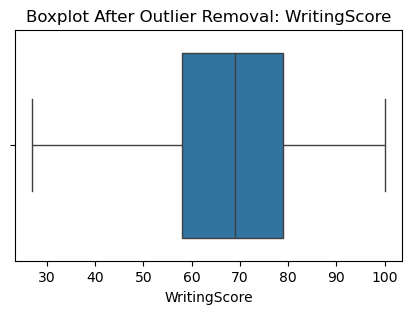

In [30]:
cols = ['MathScore', 'ReadingScore', 'WritingScore']

for col in cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df_after, x=col)
    plt.title(f"Boxplot After Outlier Removal: {col}")
    plt.show()

In [31]:
df['EthnicGroup'].unique()

array(['group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [32]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

### Pie graph Distribution of EthnicGroup

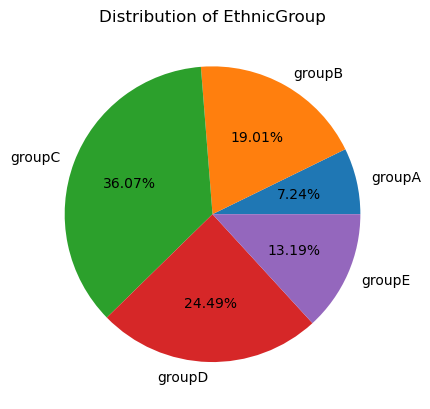

In [33]:
l = ['groupA','groupB','groupC','groupD','groupE']
mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]

plt.pie(mlist,labels = l , autopct = '%1.2f%%')
plt.title('Distribution of EthnicGroup')
plt.show()

### Countplot Distribution of Groups

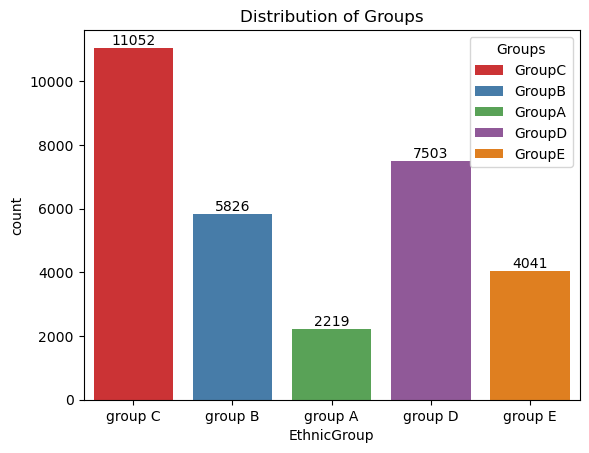

In [34]:
ax = sns.countplot(data = df , x='EthnicGroup',palette='Set1')

for container in ax.containers:
    ax.bar_label(container)

plt.legend(title="Groups", labels=["GroupC", "GroupB","GroupA","GroupD","GroupE"],loc="upper right")
plt.title("Distribution of Groups")
plt.show()

In [35]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AverageScore,Result
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,72.000000,Pass
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69.0,90.0,88.0,82.333333,Pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,90.333333,Pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45.0,56.0,42.0,47.666667,Fail
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,76.333333,Pass


In [36]:
df = df[['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
         'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
         'TransportMeans', 'WklyStudyHours', 'MathScore','ReadingScore', 
         'WritingScore', 'Result']]

In [37]:
df['Attendance'] = np.random.randint(75, 100, size=len(df))

In [38]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Result,Attendance
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0,Pass,92
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69.0,90.0,88.0,Pass,93
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,Pass,76
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45.0,56.0,42.0,Fail,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0,Pass,89


### Encoding categorical columns if any

In [39]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Result,Attendance
0,0,2,1,1,1,1,1,1,3.0,1,1,71.0,71.0,74.0,1,92
1,0,2,4,1,1,1,2,1,0.0,1,0,69.0,90.0,88.0,1,93
2,0,1,3,1,1,2,2,1,4.0,1,1,87.0,93.0,91.0,1,76
3,1,0,0,0,1,1,0,0,1.0,1,0,45.0,56.0,42.0,0,91
4,1,2,4,1,1,1,2,1,0.0,1,0,76.0,78.0,75.0,1,89


## Model Building And Splitting the Data

In [40]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Result', axis=1)   # 'Result' should be your target column
y = df_encoded['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)

In [42]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
y_pred_final_log = log_model.predict(X_test)

y_proba_log = log_model.predict_proba(X_test)[:, 1]

In [44]:
y_pred_final_log                 

array([1, 1, 1, ..., 1, 1, 1])

## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

In [46]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [47]:
y_pred_final_rf = rf_model.predict(X_test)

y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [48]:
y_pred_final_rf

array([1, 1, 1, ..., 1, 1, 1])

### Predicted of Logistic Regression

In [49]:
predicted_labels = ["Fail" if pred == 0 else "Pass" for pred in y_pred_final_log]


for i in range(10):
    print(f"Result {i+1}: {predicted_labels[i]}")

Result 1: Pass
Result 2: Pass
Result 3: Pass
Result 4: Pass
Result 5: Pass
Result 6: Pass
Result 7: Pass
Result 8: Pass
Result 9: Pass
Result 10: Pass


### Predicted of Random Forest Classifier

In [50]:
predicted_labels = ["Fail" if pred == 0 else "Pass" for pred in y_pred_final_rf]


for i in range(10):
    print(f"Result {i+1}: {predicted_labels[i]}")

Result 1: Pass
Result 2: Pass
Result 3: Pass
Result 4: Pass
Result 5: Pass
Result 6: Pass
Result 7: Pass
Result 8: Pass
Result 9: Pass
Result 10: Pass


In [51]:
threshold = 0.10

y_pred_final = (y_proba_log >= threshold).astype(int)

actual_labels = ["Fail" if val == 0 else "Pass" for val in y_test]
predicted_labels = ["Fail" if val == 0 else "Pass" for val in y_pred_final_log]

comparison = pd.DataFrame({
    'Actual': actual_labels,
    'Predicted': predicted_labels,
    'Probability': y_proba_log
})
comparison.head()

,Actual,Predicted,Probability
0,Pass,Pass,1.000000
1,Pass,Pass,1.000000
2,Pass,Pass,1.000000
3,Pass,Pass,1.000000
4,Pass,Pass,0.999966


## Comparison Actual vs Predicted 

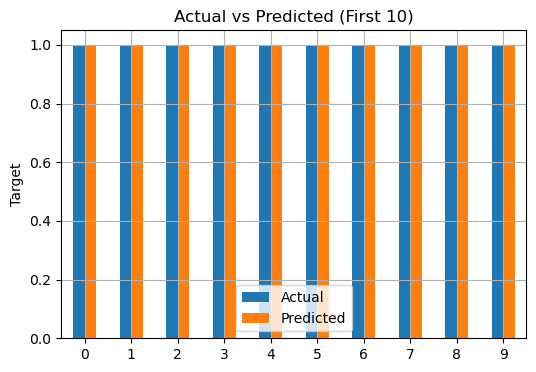

In [52]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final_log})
comparison = comparison.reset_index(drop=True)
comparison.head(10).plot(kind='bar', figsize=(6,4))
plt.title('Actual vs Predicted (First 10)')
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### Logistic Regression Evaluation

In [53]:
# Evaluate Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
log_preds = log_model.predict(X_test)

print("------ Logistic Regression ------")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("\nClassification Report:\n", classification_report(y_test, log_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_preds))

------ Logistic Regression ------
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       639
           1       1.00      1.00      1.00      5490

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129


Confusion Matrix:
 [[ 639    0]
 [   0 5490]]


### Random Forest Classifier Evaluation

In [54]:
# Evaluate Random Forest
rf_preds = rf_model.predict(X_test)

print("------ Random Forest ------")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))

------ Random Forest ------
Accuracy: 0.996084189916789

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       639
           1       1.00      1.00      1.00      5490

    accuracy                           1.00      6129
   macro avg       0.99      0.98      0.99      6129
weighted avg       1.00      1.00      1.00      6129


Confusion Matrix:
 [[ 620   19]
 [   5 5485]]


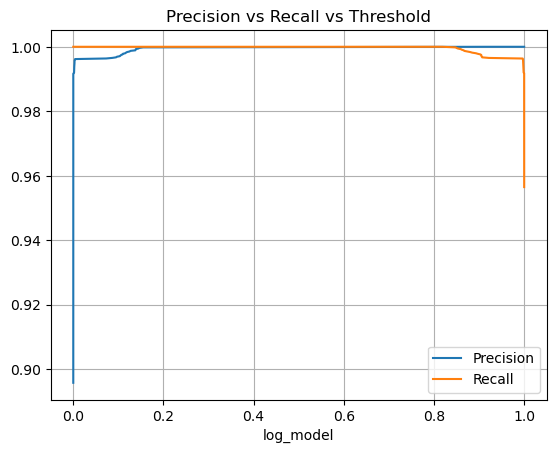

In [55]:
from sklearn.metrics import precision_recall_curve

precision, recall, log_model = precision_recall_curve(y_test, y_proba_log)
plt.plot(log_model, precision[:-1], label='Precision')
plt.plot(log_model, recall[:-1], label='Recall')
plt.xlabel("log_model")
plt.legend()
plt.grid()
plt.title("Precision vs Recall vs Threshold")
plt.show()

In [56]:
import pickle

# Save model
with open("student_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

# Save feature columns to avoid streamlit mismatch
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("Model saved successfully")

Model saved successfully


## Conclusion

The model successfully identifies patterns in student performance and predicts academic results with good accuracy. Findings show that exam preparation, parental education, and subject scores significantly influence outcomes. The system can be expanded with additional real-world factors like attendance, study hours, and learning habits. With further improvements and deployment, it can assist educators in early intervention and student progress monitoring.